In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [289]:
import numpy as np
from sklearn.datasets import make_moons
from scipy.linalg import eigh
from sklearn.decomposition import KernelPCA
from sklearn.utils.extmath import svd_flip

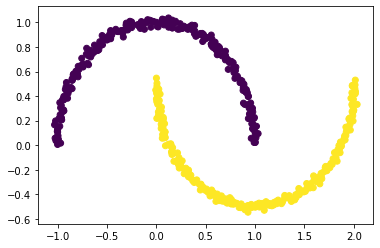

In [137]:
X, y = make_moons(n_samples = 500, noise = 0.02, random_state = 417) 
  
plt.scatter(X[:, 0], X[:, 1], c = y) 
plt.show()

In [253]:
# Define different kernels

class linear_kernel:
    def run(self, x, y):
        return(np.dot(x.T, y))

class poly_kernel:
    def __init__(self, c0=1, d=3, gamma = None):
        self.c0 = c0
        self.d = d
        self.gamma = gamma
        
    def run(self, x, y):
        if (self.gamma == None):
            self.gamma = 1 / x.size
        
        return((self.gamma * np.dot(x.T, y) + self.c0) ** self.d)
    
class sigmoid_kernel:
    def __init__(self, c0=1, gamma=None):
        self.c0 = c0
        self.gamma = gamma
        
    def run(self, x, y):
        if (self.gamma == None):
            self.gamma = 1 / x.size
            
        return(np.tanh(self.gamma * np.dot(x.T, y) + self.c0))
        
class rbf_kernel:
    def __init__(self, gamma=None):
        self.gamma = gamma
        
    def run(self, x, y):
        if (self.gamma == None):
            self.gamma = 1 / x.size
            
        return np.exp(-self.gamma * (np.linalg.norm(x-y) ** 2))



In [286]:
# Compute the Gram Matrix
def get_gram_matrix(kernel, X):
    K = np.zeros((X.shape[0], X.shape[0]))
    
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            K[i][j] = kernel.run(X[i], X[j])
    return(K)

def normalize_gram_matrix(K):
    ones = np.ones((K.shape[0], K.shape[0])) / K.shape[0]
    K_norm = K - np.matmul(ones, K) - np.matmul(K, ones) + ones.dot(K).dot(ones)
    return K_norm

def get_projections(K_norm, no_of_components):
    eigvals, eigvecs = eigh(K_norm)
    
    eigvecs, _ = svd_flip(eigvecs, np.empty_like(eigvecs).T)
    
    X_pc = eigvecs[:, -1] / np.sqrt(eigvals[-1])
    
    for i in range(2 ,no_of_components+1):
        X_pc = np.column_stack((X_pc, eigvecs[:,-i] / np.sqrt(eigvals[-i])))
    
    return X_pc

def kernel_PCA(X, no_of_components, kernel):
    G = get_gram_matrix(kernel, X)
    G_norm = normalize_gram_matrix(G)
    X_pc = get_projections(G_norm, no_of_components)
    
    return np.matmul(G_norm, X_pc) 
    

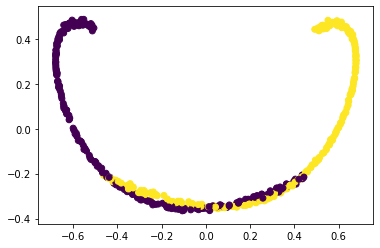

In [292]:
k_X = kernel_PCA(X, 2, rbf_kernel())

plt.scatter(k_X[:, 0], k_X[:, 1], c = y) 
plt.show()


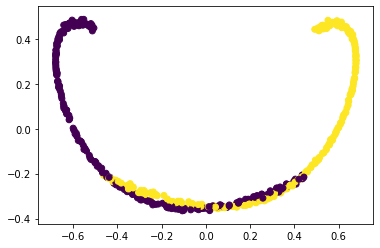

In [291]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf')
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[:, 0], X_skernpca[:, 1], c = y) 
plt.show()
